In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input,decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tqdm import tqdm
%matplotlib inline
train_data = os.listdir('train')
model=InceptionV3(weights='imagenet')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


96116736/96112376 [==============================] - 1s 0us/step


100%|██████████| 25000/25000 [18:43<00:00, 22.26it/s]


['dog.1259.jpg', 'cat.8456.jpg', 'dog.8898.jpg', 'dog.1194.jpg', 'dog.12376.jpg', 'dog.4367.jpg', 'cat.5418.jpg', 'dog.10747.jpg', 'cat.2337.jpg', 'dog.6475.jpg', 'cat.11777.jpg', 'dog.8736.jpg', 'cat.10029.jpg', 'cat.10712.jpg', 'dog.2614.jpg', 'dog.10190.jpg', 'cat.5351.jpg', 'dog.1773.jpg', 'dog.10237.jpg', 'cat.4338.jpg', 'dog.10801.jpg', 'cat.9171.jpg', 'dog.9517.jpg', 'cat.7564.jpg', 'cat.8921.jpg', 'cat.10365.jpg', 'cat.7968.jpg', 'cat.3216.jpg', 'dog.10161.jpg', 'dog.2422.jpg', 'cat.2433.jpg', 'cat.11184.jpg', 'dog.1895.jpg', 'dog.5604.jpg']


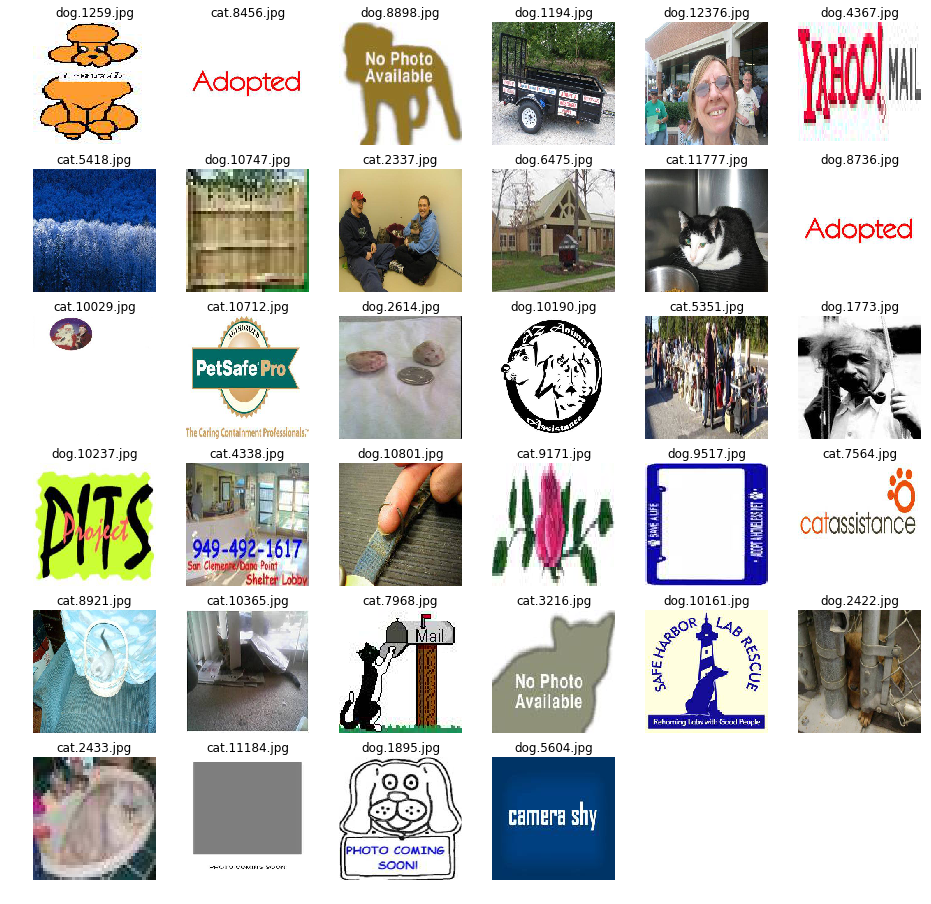

In [2]:

lables = [
 'n02085620','n02085782','n02085936','n02086079','n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364','n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721','n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339','n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258','n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437','n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105','n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236','n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177','n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251','n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550','n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089','n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185','n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889','n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712','n02113799','n02113978','n02123045','n02123159'
,'n02123394','n02123597','n02124075','n02125311','n02127052']
plt.figure(figsize=(16,32))
t=0
li3=[]
ll=len(train_data)
for i in tqdm(range(ll)):
    imgn=train_data[i]
    img_path='/home/ubuntu/p7/train/'+imgn
    img=image.load_img(img_path,target_size=(299,299))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    preds=model.predict(x)
    li=[]
    x=decode_predictions(preds,top=40)[0]
    for j in range(len(x)):
        li.append(x[j][0])       
    li2=[a for a in li if a in lables]  
    if len(li2)==0: 
        t+=1
        plt.subplot(12,6,t)
        plt.title(imgn)
        plt.axis("off")
        plt.imshow(img, interpolation="nearest")
        li3.append(imgn)   
        #print('predict:',decode_predictions(preds,top=40))
print(li3)
plt.show()